## EXPONENTIALLY WEIGHTED MOVING AVERAGE EWMA GITHUB ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pandas_profiling

EXPONENTIAL WEIGHTED MOVING AVERAGE MODEL OR EWMA 

We have heard of SMA, Simple Moving Averages. They have inherent shortcomings such as too much noise and too little signals if the window period is small, it lags behind the actual by a given period of time, it tells about the past behaviour but nothing about the future, and in terms of values, it will never reach the full peak because of averaging.That is why we use EWMA. The EMWA is the first step in forecasting. 

EWMA puts weights on more recent values. First, this is beneficial because we do notice that more recent data get   The weights are applied based on some parameters which help to define the outcomes. We will adjust the parameters until we get the desired outcomes. We will do this using the Airline data. 

In [2]:
airtravel= pd.read_csv('C:/Users/aroyl/Desktop/Datasets/airline_passengers.csv', index_col='Month')
airtravel.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


First, let's look at the dataframe's details.
Using the .info() we get a basic understanding of the number of columns and what they contain. 
We did notice that initially, when we had not set the index column, it as just a generic column giving the index. 
So we returned to the import line of code and set the definition for the index column. 

After that, we pip install pandas-profiling.
And that helps us to get the detailed profile and visualization of the dataframe.

In [3]:
airtravel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 1949-01 to International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Data columns (total 1 columns):
Thousands of Passengers    144 non-null float64
dtypes: float64(1)
memory usage: 2.3+ KB


In [4]:
pandas_profiling.ProfileReport(airtravel)

The Profile report shows that there are two missing values for one of the columns and this will interfere with out analytics and particularly we cannot use parse_dates=True. 

We also notice that the Index column is not in Datetime. 

To fix that, we first drop the rows with the missing values using Dropna=True and then set the datetime format for our index.
We then verify the format and we do see that the Month column includes the first day of the month in YYYY-MM-DD format. 

In [5]:
airtravel.dropna(inplace=True)
airtravel.index = pd.to_datetime(airtravel.index)
airtravel.head()

,Thousands_of_Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


The next step is to do a Simple Moving Average, SMA. We will do it for a six month and a 12 month period. 
As we notice in the plot below, the first few spaces on the x and y axis miss out of the SMA, ie, there is a lag. 
Also, the actual peaks are always averaged out by SMA. 

In [6]:
airtravel['6sma'] = airtravel['Thousands_of_Passengers'].rolling(window=6).mean()
airtravel['12sma'] = airtravel['Thousands_of_Passengers'].rolling(window=12).mean()

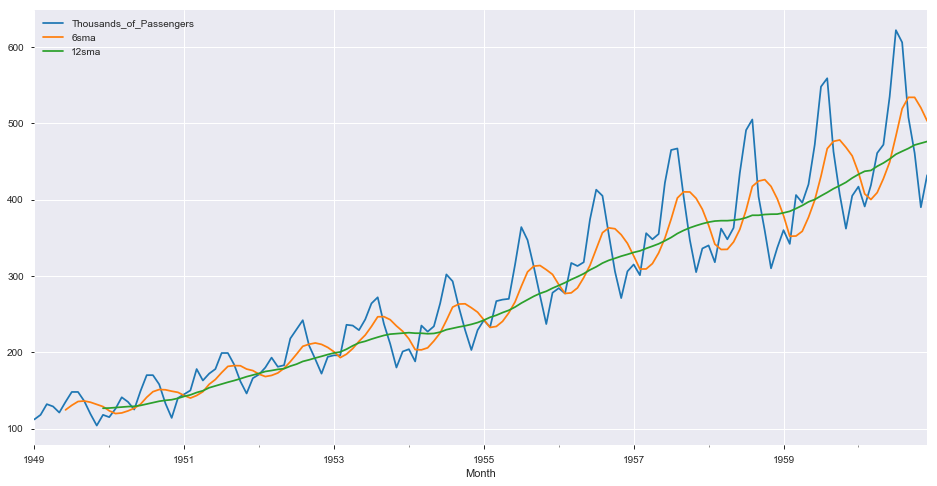

In [7]:
airtravel.plot(figsize=(16,8))

In [8]:
##### FACTORS TO KEEP IN MIND WHEN USING EMWA 

The formula is 

$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i} $

Where x_t is the input value, w_i is the applied weight (Note how it can change from i=0 to t), and y_t is the output.

Now the question is, how to we define the weight term w_i ?

This depends on the adjust parameter you provide to the .ewm() method.

When adjust is True (default), weighted averages are calculated using weights:

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When adjust=False is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When adjust=True we have y0=x0 and from the last representation above we have yt=αxt+(1−α)yt−1, therefore there is an assumption that x0 is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

One must have 0<α≤1, and while since version 0.18.0 it has been possible to pass α directly, it’s often easier to think about either the span, center of mass (com) or half-life of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* Span corresponds to what is commonly called an “N-day EW moving average”.
* Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s−1)/2
* Half-life is the period of time for the exponential weight to reduce to one half.
* Alpha specifies the smoothing factor directly.

#### Coming back to our case at hand on the number of air passengers, let us try applying EWMA with a span of 12, that is, 12 months.

In [9]:
airtravel['EWMA12'] = airtravel['Thousands_of_Passengers'].ewm(span=12).mean()

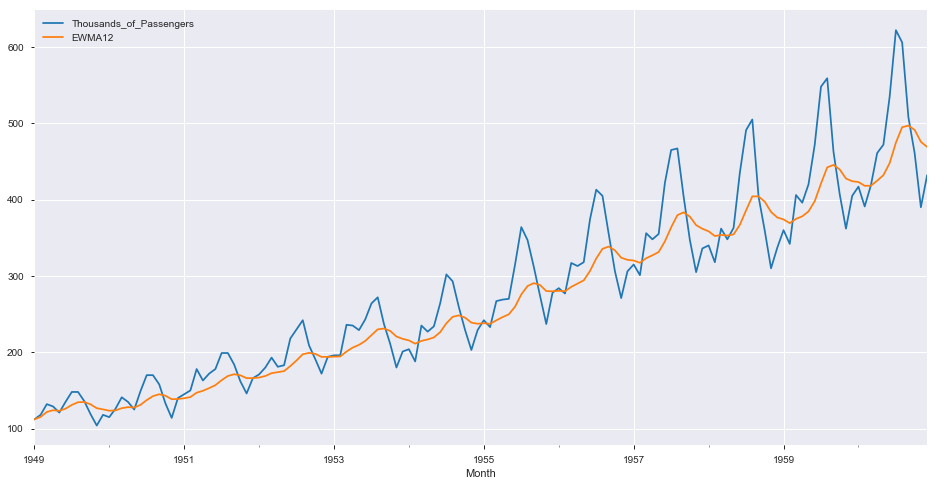

In [10]:
airtravel[['Thousands_of_Passengers','EWMA12']].plot(figsize=(16,8))

#### Note how in the plot above, the first parts of both x and y axes are plotted and how the 12 month plot here reflects the changes unlike the Simple Moving Average plot as seen further above. 

Thanks